In [ ]:
import os

import yaml

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from madness_benchmark.utils import get_benchmark_config_path

mpl.rcParams["savefig.dpi"] = 1200

%matplotlib inline

In [ ]:
with open(get_benchmark_config_path()) as f:
    benchmark_config = yaml.safe_load(f)
btksims_config = benchmark_config["btksims"]
survey_name = benchmark_config["survey_name"]

## Simulation (train/validation set) examples

In [ ]:
blended_images_dir = os.path.join(
    btksims_config["TRAIN_DATA_SAVE_PATH"][survey_name], "blended_validation"
)

In [ ]:
filename = random.choice(os.listdir(blended_images_dir))

In [ ]:
linear_norm_coeff = 10000

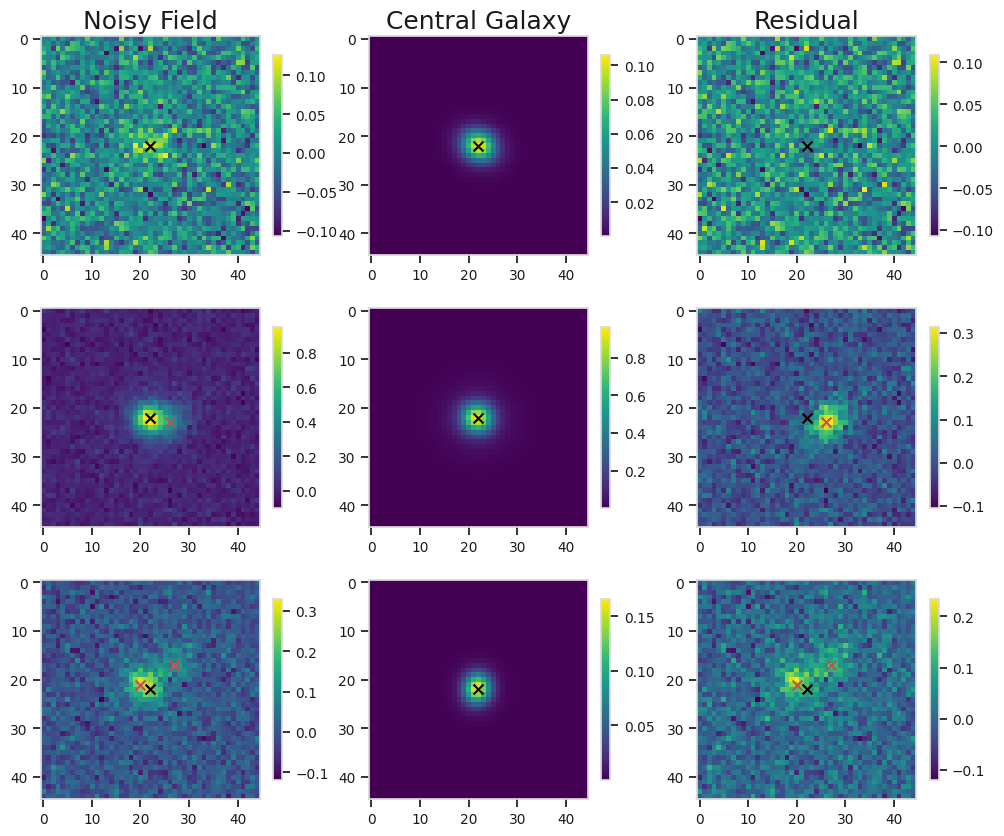

In [ ]:
sns.set_theme(
    font_scale=0.9,
    style={
        "style": "whitegrid",
        "xtick.bottom": True,
        "axes.grid": False,
        "xtick.top": False,
        "ytick.left": True,
        "ytick.right": False,
        "text.color": ".1",
        "xtick.color": ".1",
        "ytick.color": ".1",
        "axes.edgecolor": ".85",
        "axes.labelcolor": ".1",
    },
    rc={"grid.color": ".85", "grid.linestyle": "--"},
)

fig, axs = plt.subplots(3, 3, figsize=(12, 10))

random.seed(11)

band = 2

for i in range(3):
    filename = random.choice(os.listdir(blended_images_dir))
    blended_images = np.load(
        os.path.join(blended_images_dir, filename), allow_pickle=True
    )
    im = axs[i, 0].imshow(
        blended_images["blended_gal_stamps"][0][:, :, band] / linear_norm_coeff
    )
    cbar = fig.colorbar(im, ax=axs[i, 0], shrink=0.8)
    #     cbar.ax.tick_params(labelsize=13)

    im = axs[i, 1].imshow(
        blended_images["isolated_gal_stamps"][0][:, :, band] / linear_norm_coeff
    )
    cbar = fig.colorbar(im, ax=axs[i, 1], shrink=0.8)
    #     cbar.ax.tick_params(labelsize=13)

    difference = (
        blended_images["blended_gal_stamps"][0][:, :, band]
        - blended_images["isolated_gal_stamps"][0][:, :, band]
    )
    im = axs[i, 2].imshow(difference / linear_norm_coeff)
    cbar = fig.colorbar(im, ax=axs[i, 2], shrink=0.8)
    #     cbar.ax.tick_params(labelsize=13)

    for num_gal in range(len(blended_images["gal_locations_x_peak"][0])):

        axs[i, 0].scatter(
            np.round(blended_images["gal_locations_x_peak"][0][num_gal]) + 22,
            np.round(blended_images["gal_locations_y_peak"][0][num_gal]) + 22,
            c="r",
            marker="x",
            s=50,
        )

        axs[i, 2].scatter(
            np.round(blended_images["gal_locations_x_peak"][0][num_gal]) + 22,
            np.round(blended_images["gal_locations_y_peak"][0][num_gal]) + 22,
            c="r",
            marker="x",
            s=50,
        )

    for col_num in range(3):
        axs[i, col_num].scatter(22, 22, c="black", marker="x", s=50)
#         axs[i, col_num].tick_params(axis="both", which="major", labelsize=13)


axs[0, 0].set_title("Noisy Field", fontsize=18)
axs[0, 1].set_title("Central Galaxy", fontsize=18)
axs[0, 2].set_title("Residual", fontsize=18)
plt.savefig("results/blended_galaxies.pdf", bbox_inches="tight")

# Make plots for isolated galaxies

In [ ]:
isolated_images_dir = os.path.join(
    btksims_config["TRAIN_DATA_SAVE_PATH"][survey_name], "isolated_training"
)

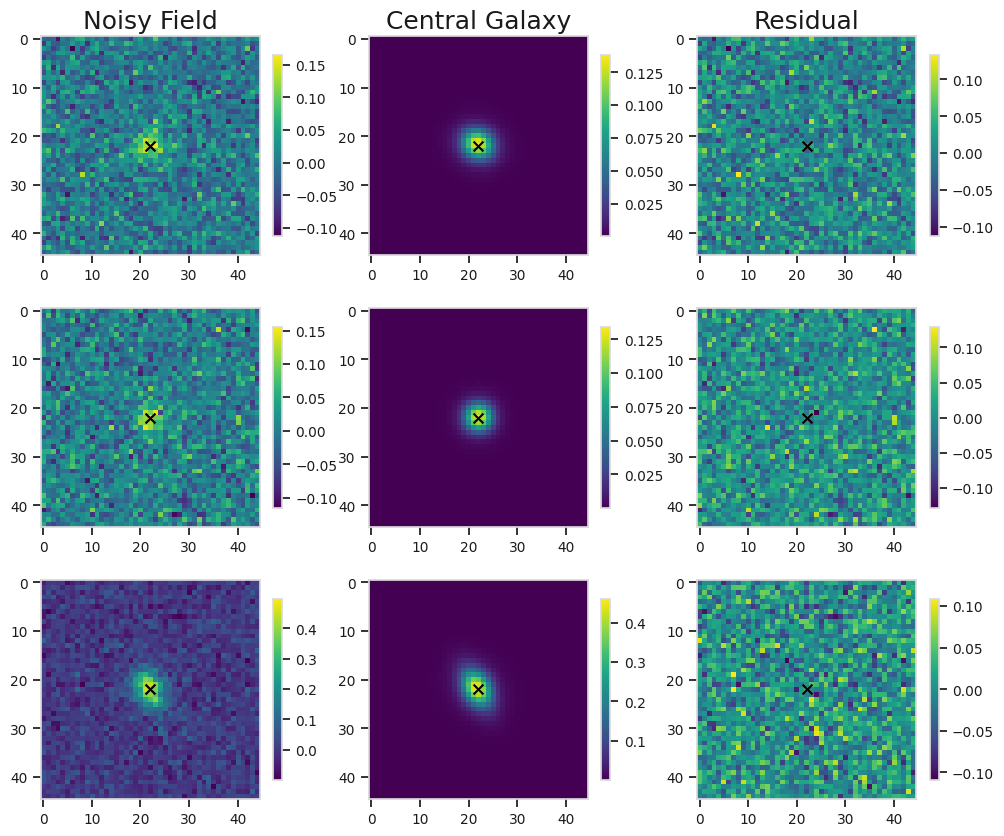

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(12, 10))

random.seed(11)

band = 2

for i in range(3):
    filename = random.choice(os.listdir(isolated_images_dir))
    blended_images = np.load(
        os.path.join(isolated_images_dir, filename), allow_pickle=True
    )
    im = axs[i, 0].imshow(
        blended_images["blended_gal_stamps"][0][:, :, band] / linear_norm_coeff
    )
    cbar = fig.colorbar(im, ax=axs[i, 0], shrink=0.8)
    #     cbar.ax.tick_params(labelsize=13)

    im = axs[i, 1].imshow(
        blended_images["isolated_gal_stamps"][0][:, :, band] / linear_norm_coeff
    )
    cbar = fig.colorbar(im, ax=axs[i, 1], shrink=0.8)
    #     cbar.ax.tick_params(labelsize=13)

    difference = (
        blended_images["blended_gal_stamps"][0][:, :, band]
        - blended_images["isolated_gal_stamps"][0][:, :, band]
    )
    im = axs[i, 2].imshow(difference / linear_norm_coeff)
    cbar = fig.colorbar(im, ax=axs[i, 2], shrink=0.8)
    #     cbar.ax.tick_params(labelsize=13)

    for num_gal in range(len(blended_images["gal_locations_x_peak"][0])):

        axs[i, 0].scatter(
            np.round(blended_images["gal_locations_x_peak"][0][num_gal]) + 22,
            np.round(blended_images["gal_locations_y_peak"][0][num_gal]) + 22,
            c="r",
            marker="x",
            s=50,
        )

        axs[i, 2].scatter(
            np.round(blended_images["gal_locations_x_peak"][0][num_gal]) + 22,
            np.round(blended_images["gal_locations_y_peak"][0][num_gal]) + 22,
            c="r",
            marker="x",
            s=50,
        )

    for col_num in range(3):
        axs[i, col_num].scatter(22, 22, c="black", marker="x", s=50)
#         axs[i, col_num].tick_params(axis="both", which="major", labelsize=13)


axs[0, 0].set_title("Noisy Field", fontsize=18)
axs[0, 1].set_title("Central Galaxy", fontsize=18)
axs[0, 2].set_title("Residual", fontsize=18)
plt.savefig("results/isolated_galaxies.pdf", bbox_inches="tight")